<center><h1 style="color:#173F8A;"> Metodos para Ecuaciones Diferenciales, IMT3410, 2023-2 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

## Discontinuous Galerkin Methods for Ordinary Differential Equations 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
from scipy.special import binom
from scipy.linalg import lu_factor, lu_solve
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

In [8]:
np.set_printoptions(precision=16)
import numpy as np
import numpy.linalg as la
import scipy.special as sps
import matplotlib.pyplot as pt
from functools import partial

def bisection(f, a, b, tol=1e-14):
    assert np.sign(f(a)) != np.sign(f(b))
    while b-a > tol:
        m = a + (b-a)/2
        fm = f(m)
        if np.sign(f(a)) != np.sign(fm):
            b = m
        else:
            a = m
            
    return m

def radau_func(n, x):
    return (
        (sps.eval_legendre(n-1, x) + sps.eval_legendre(n, x))
        /
        (1+x))
Abscisaes = []
Weights = []
for n in range(2, 16):
    brackets = sps.legendre(n).weights[:, 0]

    nodes = None
    # Root finding left as an exercise for the reader. :)
    nodes = np.zeros(n)
    nodes[0] = -1

    

    # Use the fact that the roots of P_{n-1} bracket the roots of P_{n-1}':
    for i in range(n-1):
        nodes[i+1] = bisection(
            partial(radau_func, n),
            brackets[i], brackets[i+1])

#     mesh = np.linspace(-1, 1, 300)
#     pt.plot(mesh, radau_func(n, mesh))
#     pt.plot(nodes, 0*nodes, "o")
#     print(nodes)

    max_degree = len(nodes) - 1
    powers = np.arange(max_degree+1)

    Vt = nodes ** powers.reshape(-1, 1)

    a, b = -1, 1
    rhs = 1/(powers+1) * (b**(powers+1) - a**(powers+1))

    w = la.solve(Vt, rhs)
    Abscisaes.append(nodes)
    Weights.append(w)
print(Abscisaes)
print(Weights)

[array([-1.                ,  0.3333333333333397]), array([-1.                , -0.2898979485566383,  0.6898979485566306]), array([-1.                , -0.5753189235216932,  0.1810662711185295,
        0.8228240809745984]), array([-1.                , -0.720480271312438 , -0.1671808647378284,
        0.4463139727237448,  0.8857916077709618]), array([-1.                , -0.8029298284023403, -0.3909285467072739,
        0.1240503795052255,  0.6039731642527779,  0.9203802858970604]), array([-1.                , -0.8538913426394764, -0.5384677240601146,
       -0.1173430375431052,  0.3260306194376971,  0.7038428006630242,
        0.9413671456804298]), array([-1.                , -0.88747487892615  , -0.639518616526219 ,
       -0.2947505657736668,  0.094307252661111 ,  0.4684203544308115,
        0.7706418936781918,  0.9550412271225797]), array([-1.                , -0.9107320894200532, -0.711267485915709 ,
       -0.4263504857111367, -0.0903733696068541,  0.2561356708334611,
        0.57

## Regla de cuadratura de Gauss Legendre

In [12]:
# Quadrature Gauss-Legendre
def quad_Gauss_Legendre(fun, a=-1,b=1, n=6):
    theta, w = leggauss(n)
    sum = 0; h = 0.5*(b-a); m = 0.5*(a+b)
    for k in range(len(theta)):
        sum += w[k]*fun(m+theta[k]*h)
    return h*sum

# Quadrature Gauss-Legendre
from GaussRadau import Gauss_Radau_nodes_and_weights
def quad_Gauss_Radau(fun, a=-1,b=1, n=6):
    theta, w = Gauss_Radau_nodes_and_weights(max(n,2))
    sum = 0; h = 0.5*(b-a); m = 0.5*(a+b)
    for k in range(len(theta)):
        sum += w[k]*fun(m+theta[k]*h)
    return h*sum

## Triangulacion de elementos finitos

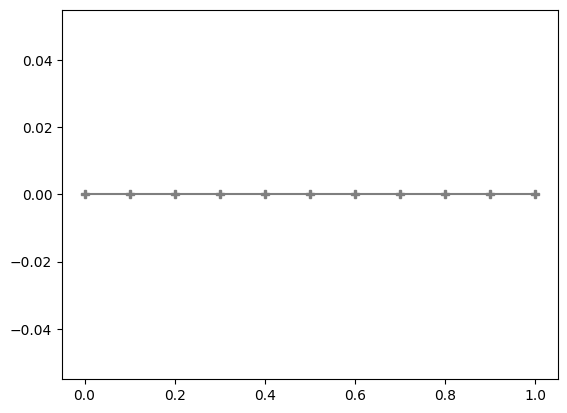

In [13]:
N = 10
Coordinates = np.linspace(0,1,N+1)
Elements = np.asarray([[i,i+1] for i in range(N)])
plt.plot(Coordinates, np.zeros(N+1), 'P-',markersize=6, color='C07')
plt.show()

## Base polinomial de Bernstein

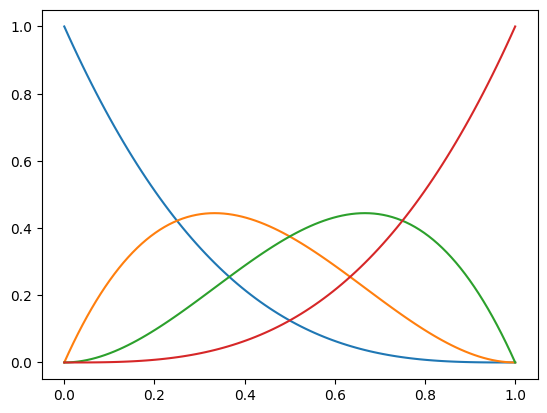

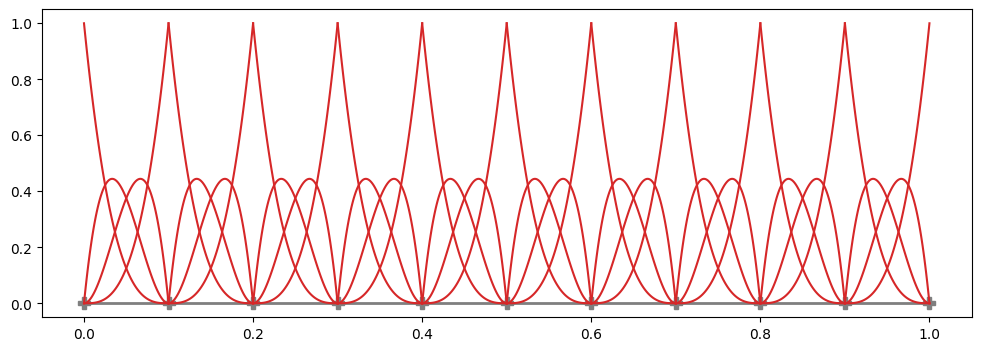

In [14]:
# Bernstein-Bezier Basis in 1D on the interval [a,b]
def Bernsteinbasis(t,n,j,interval = (0.0,1.0)):
    a,b = interval
    lambda1 = -(t-b)/(b-a)
    lambda2 = (t-a)/(b-a)
    return binom(n,j)*lambda1**(n-j)*lambda2**j

def BernsteinInterp(t, ci, interval):
    # implement this usin deCasteljau
    n = len(ci)-1
    return sum([ci[j]*Bernsteinbasis(t,n,j,interval= interval) for j in range(n+1)])

def plotbasis_interval(n=6, interval=(0,1), ax=None, color=None):    
    a,b = interval
    tt = np.linspace(a,b,100)
    if ax is None:
        fig, ax = plt.subplots()
    for j in range(n+1):
        ax.plot(tt, Bernsteinbasis(tt,n,j, [a,b]), color=color)

def plotbasis_global(n, Coordinates, Elements):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
    ax.plot(Coordinates, np.zeros(N+1), 'P-',markersize=8, color='C07', linewidth=2)
    for j in range(Elements.shape[0]):
        a = Coordinates[Elements[j,0]]
        b = Coordinates[Elements[j,1]]
        plotbasis_interval(n=n, interval=(a,b), ax=ax, color='C03')
plotbasis_interval(n=3)
plotbasis_global(n=3, Coordinates=Coordinates, Elements=Elements)

## Solver para EDO usando FEM - lineal

In [15]:
def int_dB_B(n,i,k):
    # Computes integral_{I_j} (B_i^n)'(b_k^n) dx
    if i == 0:
        return -0.5*binom(n,k)/binom(2*n-1,k) 
    elif i == n:
        return 0.5*binom(n,k)/binom(2*n-1,n-1+k)
    else:
        return 0.5*binom(n,k)*binom(n-1,i)/binom(2*n-1,i+k)*(n*(i-k)/((n-i)*(i+k))) 

In [18]:
def dg_odesolver_linear(Coordinates, Elements, f, u0, n): # Resuelve secuencialmente por elemento
    N = Elements.shape[0] # numero de elementos
    uleft = u0
    usol = []
    for i in range(N): # interacion sobre los intervalos
        # matriz local
        ta = Coordinates[Elements[i,0]]; tb = Coordinates[Elements[i,1]]
        AK = np.zeros((n+1,n+1), dtype=np.float64)
        for k in range(0, n+1):
            for j in range(n+1):
                AK[k,j] = int_dB_B(n,j,k)
        AK[0,0] += 1.0
        # vector derecho local
        
        cK = np.zeros(n+1, dtype=np.float64)
        for k in range(0,n+1):
            phik = lambda t: Bernsteinbasis(t,n,k,[ta,tb])                                      
            func = lambda t: f(t)*phik(t)
            cK[k] = quad_Gauss_Radau(func,ta,tb,n)
        cK[0] += uleft
        # Resolver el sistema local
        usolK = np.linalg.solve(AK,cK)
        usol.append(usolK)
        uleft = usolK[n]
    return usol
def plot_piecewise_poly(usol, n, Coordinates, Elements, ax=None):
    N = Elements.shape[0]
    if ax is None:
        fig, ax = plt.subplots(1,1)
    ax.plot(Coordinates, np.zeros(N+1), 'P-',markersize=8, color='C07', linewidth=2)
    for i in range(N):
        ta = Coordinates[Elements[i,0]]
        tb = Coordinates[Elements[i,1]]
        ci = usol[i]
        ui = lambda t: BernsteinInterp(t, ci, [ta,tb])
        tti = np.linspace(ta,tb,5)
        ax.plot(tti, ui(tti), 'C00')
    plt.legend(['triang.','solucion aprox.'])
    return fig,ax

## Ejemplo 1: caso lineal 
$$u'(t) = f(t, u(t)) = t,\quad u(0) = 1$$

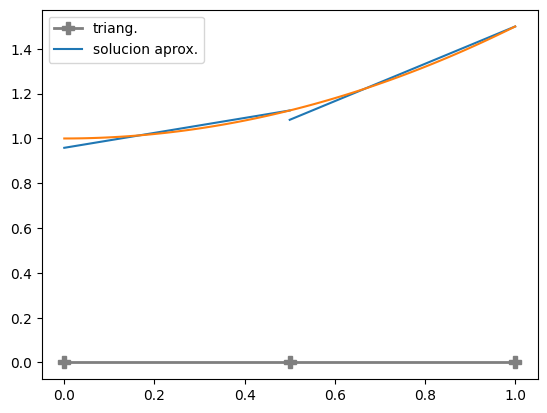

In [19]:
# Tringulacion
N = 2
Coordinates = np.linspace(0,1,N+1)
Elements = np.asarray([[i,i+1] for i in range(N)])
# Datos del problema
f = lambda t: t
uexact = lambda t: 0.5*t**2 + 1.0
# initial condition # y' = t y(0)=1 ==> y= t^2/2+1
u0 = 1.0
# Resolver
n = 1
usol = dg_odesolver_linear(Coordinates, Elements, f, u0, n=n)
fig, ax = plot_piecewise_poly(usol, n, Coordinates, Elements)
tt = np.linspace(0,1,100)
ax.plot(tt, uexact(tt), 'C01')
plt.show()

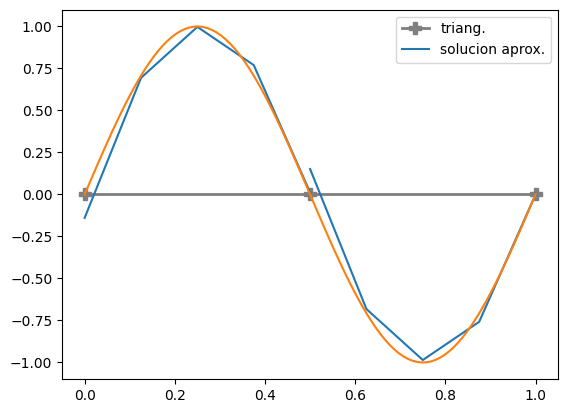

In [21]:
# Tringulacion
N = 2
Coordinates = np.linspace(0,1,N+1)
Elements = np.asarray([[i,i+1] for i in range(N)])
# Datos del problema
f = lambda t: (2.0*np.pi)*np.cos(2*np.pi*t)
uexact = lambda t: np.sin(2*np.pi*t)
# initial condition # y' = t y(0)=1 ==> y= t^2/2+1
u0 = .0
# Resolver
n = 3

usol = dg_odesolver_linear(Coordinates, Elements, f, u0, n=n)
fig, ax = plot_piecewise_poly(usol, n, Coordinates, Elements)
tt = np.linspace(0,1,100)
ax.plot(tt, uexact(tt), 'C01')
plt.show()

### Solver para el problema no lineal, $f$ depende de $u(t)$

In [23]:
MAXITER = 100
TOL =1e-8
def dg_odesolver_nonlinear(Coordinates, Elements, f, u0, n): # Resuelve secuencialmente por elemento
    N = Elements.shape[0] # numero de elementos
    uleft = u0
    usol = []
    for i in range(N): # interacion sobre los intervalos
        # matriz local
        ta = Coordinates[Elements[i,0]]; tb = Coordinates[Elements[i,1]]
        hj = abs(tb-ta)
        AK = np.zeros((n+1,n+1), dtype=np.float64)
        for k in range(n+1):
            for j in range(n+1):
                AK[k,j] = int_dB_B(n,j,k)
        AK[0,0] += 1.0
        lu, piv = lu_factor(AK)
        # Fix point iteration 
        usolKnew = uleft*np.ones(n+1); error=1.0; iter = 0
        while iter <MAXITER and error>TOL:
            usolK = usolKnew
            uK = lambda t: BernsteinInterp(t, usolK, [ta,tb])
            # vector derecho local
            cK = np.zeros(n+1, dtype=np.float64)
            for k in range(0,n+1):
                phik = lambda t: Bernsteinbasis(t,n,k,[ta,tb])
                func = lambda t: f(t, uK(t))*phik(t)
                cK[k] = quad_Gauss_Radau(func,ta,tb,n)
            cK[0] += uleft
            # Resolver el sistema local
#             usolKnew = np.linalg.solve(AK,cK)
            usolKnew = lu_solve((lu, piv), cK)
            error = np.linalg.norm(usolKnew - usolK)
            iter +=1
        usol.append(usolK)
        uleft = usolK[n]
    return usol

## Ejemplo 2: caso no lineal
$$ u'(t) = f(t,u(t)) = -2t u^{2}, \quad u(0) =  1 $$

In [28]:
# Triangulacion
N = 4
Coordinates = np.linspace(0,1,N+1)
Elements = np.asarray([[i,i+1] for i in range(N)])
# Datos del problema
fnonlinear = lambda t,u: -2*t*u**2
# initial condition # y' = -2ty^2, y(0)=1 ==> y= 1/(1+t^2)
u0 = 1.0
n=1
usol = dg_odesolver_nonlinear(Coordinates, Elements, fnonlinear, u0, n=n)

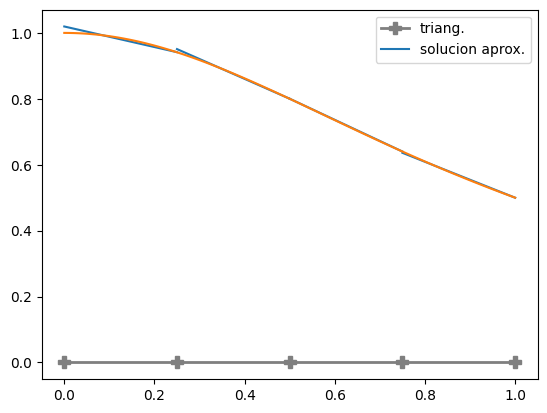

In [29]:
fig,ax = plot_piecewise_poly(usol, n, Coordinates, Elements)
tt = np.linspace(0,1,100)
uexact = lambda t: 1.0/(1+t**2)
ax.plot(tt, uexact(tt), 'C01')
plt.show()